In [135]:
# Initialise packages 
from model import U2NET
import coremltools as ct
from coremltools.proto import FeatureTypes_pb2 as ft
import torch
import os
from PIL import Image
from torchvision import transforms
from skimage import io, transform
import numpy as np

In [141]:
# Re-open model for modification and append new output layers.
model = ct.models.MLModel("updated_model.mlmodel")

RGB


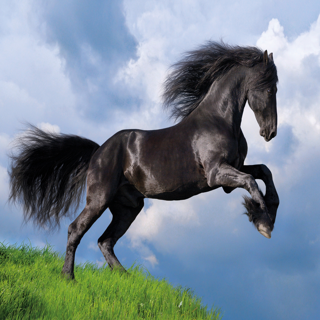

In [161]:
# Create a test input.

# Specify an image as input here
original_image = Image.open("test_data/test_images/horse_jump.jpeg")

print(original_image.mode)

input_image = original_image.resize((320,320))

'''
R, G, B = input_image.split()
input_image = Image.merge("RGB", (R, G, B))
'''
display(input_image)

In [162]:
# Test our model.
out_dict = model.predict({'in_0': input_image})
print(len(out_dict))

7


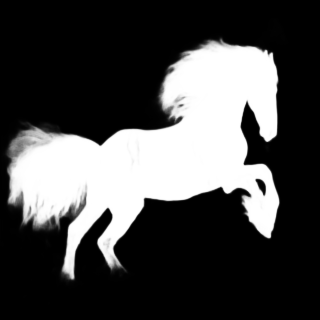

In [163]:
im = out_dict['out_p0']
im

(1400, 1036) (1400, 1036)


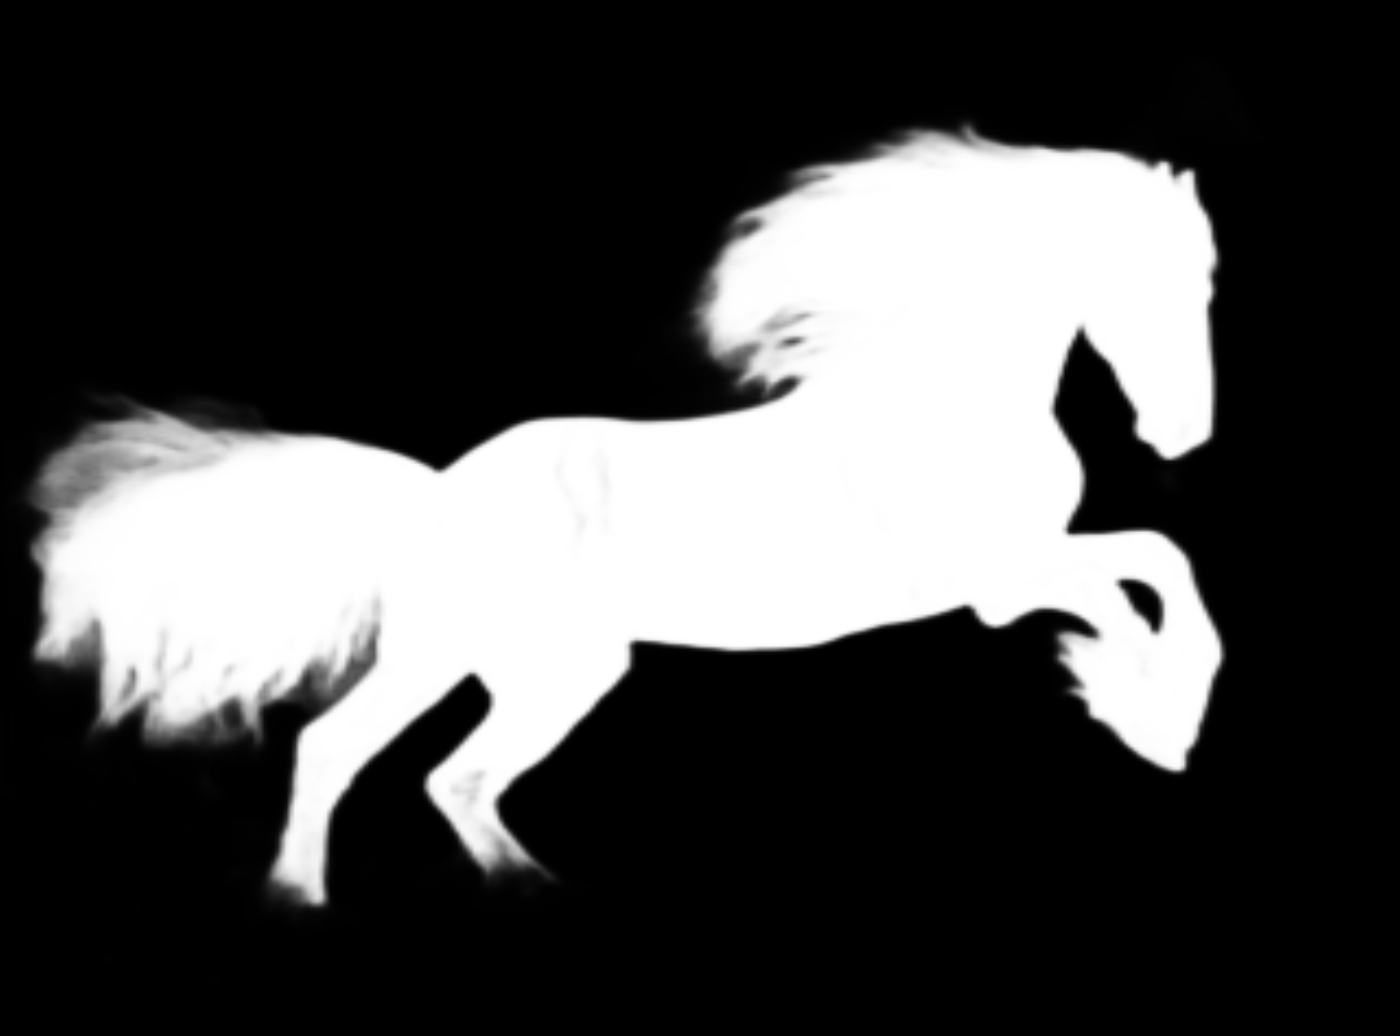

In [164]:
imo = im.resize((original_image.size[0],original_image.size[1]),resample=Image.BILINEAR)
print(original_image.size, imo.size)
imo